In [11]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [16]:
series = read_csv('C:/users/subha/documents/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


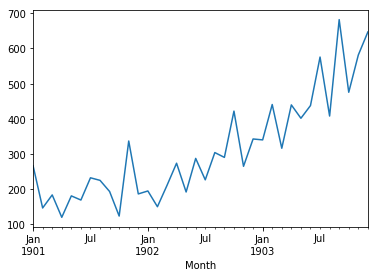

In [19]:
print(series.head())
series.plot()
pyplot.show()

In [20]:
X = series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [21]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [22]:
train, test = X[0:size], X[size:len(X)]

In [23]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964483, expected=421.600000
predicted=290.313832, expected=264.500000
predicted=349.117699, expected=342.300000
predicted=306.512990, expected=339.700000
predicted=387.376402, expected=440.400000
predicted=348.154141, expected=315.900000
predicted=386.308855, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379454, expected=437.400000
predicted=394.737311, expected=575.500000
predicted=434.915513, expected=407.600000
predicted=507.923393, expected=682.000000
predicted=435.483107, expected=475.300000
predicted=652.743840, expected=581.300000
predicted=546.343507, expected=646.900000
Test MSE: 7547.806


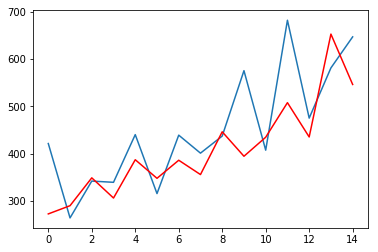

In [24]:

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()